📌  **상단의 '파일-드라이브에 사본 저장' 해서 본인 드라이브에 저장된 사본 이용해서 실습 해주세요!!**

📌 week13 복습습과제는 **NLG 실습**으로 구성되어 있습니다.

📌 위키독스의 딥러닝을 이용한 자연어 처리 입문 교재 실습, 관련 블로그 등의 문서 자료로 구성되어 있는 과제입니다. 

📌 안내된 링크에 맞추어 **직접 코드를 따라 치면서 (필사)** 해당 nlp task 의 기본적인 라이브러리와 메서드를 숙지해보시면 좋을 것 같습니다😊 필수라고 체크한 부분은 과제에 반드시 포함시켜주시고, 선택으로 체크한 부분은 자율적으로 스터디 하시면 됩니다.

📌 궁금한 사항은 깃허브 이슈나, 카톡방, 세션 발표 시작 이전 시간 등을 활용하여 자유롭게 공유해주세요!

In [ ]:
import nltk
# nltk colab 환경에서 실행시 필요한 코드입니다. 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

🥰 **이하 예제를 실습하시면 됩니다.**

**1-(1)~(2)는 필수과제, 2는 선택과제입니다.**


### **1️⃣ NLG task 실습**

👀 내용 복습

NLG 는 새로운 text 를 만들어 내는 모든 task 를 의미하며 기계번역, 텍스트 요약, 채팅, 스토리텔링, QA 등이 있다. 

🔹 1-(1) RNN 을 이용한 text generation 

📌 [Text generation with RNN](https://wikidocs.net/45101) 

* Simple RNN 을 이용한 간단한 한국어 text generation 예제와 LSTM 을 이용한 뉴욕 타임즈 기사 헤드라인 생성 예제를 필사해주세요.

# Simple RNN 이용한 간단한 한국어 text generation 예제

In [ ]:
#데이터에 대한 이해와 전처리

import tensorflow
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [ ]:
#단어 집합 생성 및 크기 확인
#단어 집합의 크기를 저장할 때는 케라스 토크나이저의 정수 인코딩은 인덱스가 1부터 시작하지만,
#패딩을 위한 0을 고려하여 +1을 해줌

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index)+1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [ ]:
#각 단어와 단어에 부여된 정수 인덱스 출력
print(tokenizer.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [ ]:
#훈련 데이터 만들기
sequences = list()
for line in text.split('\n'): #줄바꿈 문자를 기준으로 문장 토큰화
  encoded = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(encoded)):
    sequence = encoded[:i+1]
    sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' %len(sequences))

학습에 사용할 샘플의 개수: 11


In [ ]:
#전체 샘플 출력(아직 레이블로 사용될 분리하지 않은 훈련 데이터)
print(sequences)
#[2,3]:[경마장에, 있는], [2,3,1]:[경마장에, 있는, 말이]에 해당
#전체 훈련 데이터에 대해서 맨 우측에 있는 단어에 대해서만 레이블로 분리해야 함.

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [ ]:
#우선 전체 샘플에 대해 길이를 일치시켜줌(가장 긴 샘플의 길이를 기준으로)
max_len = max(len(l) for  l in sequences) #모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이: {}'.format(max_len))


샘플의 최대 길이: 6


In [ ]:
#전체 훈련 데이터에서 가장 긴 샘플의 길이가 6이므로 전체 샘플의 길이를 6으로 패딩
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
#pad_sequences()는 모든 샘플에 대해 0을 사용하여 길이를 맞춰줌.
#maxlen의 값으로 6을 주면 모든 샘플의 길이를 6으로 맞춰주며,
#padding의 인자로 'pre'를 주면 길이가 6보다 짧은 샘플의 앞에 0으로 채움.

In [ ]:
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [ ]:
#길이가 6보다 짧은 모든 샘플에 대해 앞에 0을 채워서 모든 샘플의 길이를 6으로 바꿨음.
#이제 각 샘플의 마지막 단어를 레이블로 분리해야 함.
#레이블의 분리는 Numpy이용해서 가능함.
#리스트의 마지막 값을 제외하고 저장한 것은 X, 리스트의 마지막 값만 저장한 것은 y.<- 레이블

sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:, -1]

In [ ]:
#분리된 X와 y에 대해 출력
print(X)
print(y)
#레이블이 분리됨.

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]
[ 3  1  4  5  1  7  1  9 10  1 11]


In [ ]:
#RNN모델에 훈련 데이터를 훈련 시키기 전에 레이블에 대해 원-핫 인코딩을 수행
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
#원-핫 인코딩이 수행되었는지 출력
print(y)
#정상적으로 원-핫 인코딩이 수행됨

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


* 모델 설계하기

In [ ]:
#RNN 모델에 데이터를 훈련시킴
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [ ]:
embedding_dim = 10 #하이퍼파라미터인 임베딩 벡터의 차원은 10
hidden_units = 32 #은닉 상태의 크기는 32

model = Sequential() #다 대일 구조의 RNN을 사용함
model.add(Embedding(vocab_size, embedding_dim)) #전결합층을 출력층을 출력층으로 단어 집합 크기만큼의 뉴런을 배치하여 모델을 설계함
model.add(SimpleRNN(hidden_units)) #해당 모델은 마지막 시점에서 모든 가능한 단어 중 하나의 단어를 예측하는 다중 클래스 분류 문제를 수행하는 모델
model.add(Dense(vocab_size, activation = 'softmax')) #다중 클래스 분류 문제의 경우, 출력층에 소프트맥스 회귀를 사용해야 하므로 활성화 함수로 소프트맥스 함수 사용
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy']) #손실 함수로 크로스엔트로피 함수를 사용함
model.fit(X, y, epochs=200, verbose = 2) #200에포크 수행

Epoch 1/200
1/1 - 1s - loss: 2.4794 - accuracy: 0.0909 - 1s/epoch - 1s/step
Epoch 2/200
1/1 - 0s - loss: 2.4675 - accuracy: 0.1818 - 9ms/epoch - 9ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4555 - accuracy: 0.2727 - 7ms/epoch - 7ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4434 - accuracy: 0.2727 - 10ms/epoch - 10ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4311 - accuracy: 0.2727 - 13ms/epoch - 13ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4184 - accuracy: 0.3636 - 7ms/epoch - 7ms/step
Epoch 7/200
1/1 - 0s - loss: 2.4053 - accuracy: 0.3636 - 7ms/epoch - 7ms/step
Epoch 8/200
1/1 - 0s - loss: 2.3918 - accuracy: 0.3636 - 8ms/epoch - 8ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3778 - accuracy: 0.3636 - 9ms/epoch - 9ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3631 - accuracy: 0.3636 - 11ms/epoch - 11ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3478 - accuracy: 0.3636 - 12ms/epoch - 12ms/step
Epoch 12/200
1/1 - 0s - loss: 2.3318 - accuracy: 0.3636 - 9ms/epoch - 9ms/step
Epoch 13/200
1/1 - 0s - loss: 2.3150 - accuracy: 0.3636

In [ ]:
#모델이 정확하게 예측하고 있는지 문장을 생성하는 함수를 만들어 출력해봄

def sentence_generation(model, tokenizer, current_word, n): #모델, 토크나이저, 현재단어, 반복할 횟수
  init_word = current_word
  sentence = ''

  #n번 반복
  for _ in range(n):
    # 현재 단어에 대한 정수 인코딩과 패딩
    encoded = tokenizer.texts_to_sequences([current_word])[0]
    encoded = pad_sequences([encoded], maxlen=5, padding='pre')
    # 입력한 X(현재 단어)에 대해 Y(예측단어)를 예측하고 Y를 result에 저장.

    result = model.predict(encoded, verbose=0)
    result = np.argmax(result, axis =1) 

    for word, index in tokenizer.word_index.items():
      #만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
      if index == result:
        break

    # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    current_word = current_word + ' ' + word

    # 예측 단어를 문장에 저장
    sentence = sentence + ' ' + word

  sentence = init_word + sentence
  return sentence

 #입력된 단어로부터 다음 단어를 예측해서 문장을 생성하는 함수 

In [ ]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [ ]:
print(sentence_generation(model, tokenizer, '그의',2))

그의 말이 법이다


In [ ]:
print(sentence_generation(model, tokenizer, '가는', 5))

가는 말이 고와야 오는 말이 곱다


-> 앞의 문맥을 기준으로 '말이' 라는 단어 다음에 나올 단어를 기존 훈련 데이터와 일치하게 예측함을 보여줌.
But, 이 모델은 충분한 훈련 데이터를 갖고 있지 못하므로 위에서 문장의 길이에 맞게 적절하게 예측해야하는 횟수 4,2,5를 각각 인자값으로 주었음. 이 이상의 숫자를 주면 기계는 '있다', '법이다', '곱다' 다음에 나오는 단어가 무엇인지 배운 적이 없으므로 임의 예측을 하게됨.

# LSTM 이용한 텍스트 생성하기

* 데이터에 대한 이해와 전처리

In [ ]:
import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [ ]:
#어떤 열이 있고, 열이 총 몇 개가 있는지 출력
print('열의 개수: ', len(df.columns))
print(df.columns)

열의 개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [ ]:
#총 15개의 열이 존재, 여기서 사용할 열은 제목에 해당되는 headline 열
#Null 값이 있는지 확인

print(df['headline'].isnull().values.any())

False


In [ ]:
#headline 열에서 모든 신문 기사의 제목을 뽑아서 하나의 리스트로 저장

headline = []
#헤드라인의 값들을 리스트로 저장
headline.extend(list(df.headline.values))
headline[:5]

#4,5th 샘플에 Unknown값이 들어가 있음. Null값은 아니지만 실습에 도움이 되지 않는 노이즈 데이터 -> 제거


['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [ ]:
#제거 전, 후의 샘플 개수 비교
print('총 샘플의 개수: {}'.format(len(headline)))

총 샘플의 개수: 1324


In [ ]:
#Unknown 값을 가진 샘플 제거
headline = [word for word in headline if word != "Unknown"]
print('노이즈값 제거 후 샘플의 개수: {}'.format(len(headline)))

노이즈값 제거 후 샘플의 개수: 1214


In [ ]:
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

* 데이터 전처리 수행

In [ ]:
#구두점 제거와 단어의 소문자화

def repreprocessing(raw_sentence):
  preprocessed_sentence = raw_sentence.encode("utf8").decode("ascii",'ignore')
  return ''.join(word for word in preprocessed_sentence if word not in punctuation).lower()

preprocessed_headline = [repreprocessing(x) for x in headline]
preprocessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [ ]:
#단어 집합(vocabulary)을 만들고 크기를 확인

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size = len(tokenizer.word_index) +1
print('단어 집합의 크기: %d' %vocab_size)

단어 집합의 크기: 3494


In [ ]:
#정수 인코딩을 진행하는 동시에 하나의 문장을 여러 줄로 분해하여 훈련 데이터를 구성

sequences = list()

for sentence in preprocessed_headline:

  #각 샘플에 대한 정수 인코딩
  encoded = tokenizer.texts_to_sequences([sentence])[0]
  for i in range(1, len(encoded)):
    sequence = encoded[:i+1]
    sequences.append(sequence)

sequences[:11]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

* 위 sequences는 모든 문장을 각 단어가 각 시점(time step)마다 하나씩 추가적으로 등장하는 형태로 만들기는 했지만, 아직 예측할 단어에 해당되는 레이블을 분리하는 작업까지는 수행하지 않은 상태

In [ ]:
#어떤 정수가 어떤 단어를 의미하는지 알아보기 위해 인덱스로부터 단어를 찾는 index_to_word를 만듦
index_to_word = {}
for key, value in tokenizer.word_index.items():
  index_to_word[value] = key #인덱스를 단어로 바꾸기 위해 index_to_word를 생성

print('빈도수 상위 582번 단어 : {}'.format(index_to_word[582]))

빈도수 상위 582번 단어 : offer


In [ ]:
#y데이터를 분리하기 전에 전체 샘플의 길이를 동일하게 만드는 패딩 작업을 수행
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이: {}'.format(max_len))

샘플의 최대 길이: 24


In [ ]:
#가장 긴 샘플의 길이인 24로 모든 샘플의 길이를 패딩

sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

#padding='pre'를 설정하여 샘플의 길이가 24보다 짧은 경우에 앞에 0으로 패딩됨.

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


In [ ]:
#맨 우측 단어만 레이블로 분리
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [ ]:
#훈련데이터 X에서 3개의 샘플만 출력 -> 맨 우측에 있던 정수값 3개가 사라짐
#각 샘플의 길이가 24에서 23으로 줄음.
print(X[:3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  99 269]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  99 269 371]]


In [ ]:
#훈련 데이터 y 중 3개의 샘플만 출력
print([y[:3]])

[array([ 269,  371, 1115], dtype=int32)]


In [ ]:
#레이블 데이터 y에 대해 원-핫 인코딩 수행
y = to_categorical(y, num_classes=vocab_size)

* 모델 설계

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [ ]:
embedding_dim = 10 #임베딩 벡터의 차원은 10
hidden_units = 128 #은닉 상태의 크기는 128

model = Sequential() #다대일 구조의 LSTM 사용
model.add(Embedding(vocab_size, embedding_dim)) #전결합층을 출력층으로 단어 집합 크기만큼의 뉴런을 배치하여 모델 설계
model.add(LSTM(hidden_units)) #마지막 시점에서 모든 가능한 단어 중 하나의 단어 예측하는 다중 클래스 분류문제 수행 모델
model.add(Dense(vocab_size, activation='softmax')) #출력층에 소프트맥스 회귀를 사용 -> 활성화 함수로 소프트맥스 함수 사용
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #손실 함수로 크로스엔트로피 함수 사용
model.fit(X,y, epochs=200, verbose =2) #200에포크 수행

Epoch 1/200
244/244 - 12s - loss: 7.6701 - accuracy: 0.0249 - 12s/epoch - 48ms/step
Epoch 2/200
244/244 - 9s - loss: 7.1258 - accuracy: 0.0301 - 9s/epoch - 38ms/step
Epoch 3/200
244/244 - 9s - loss: 6.9836 - accuracy: 0.0322 - 9s/epoch - 38ms/step
Epoch 4/200
244/244 - 9s - loss: 6.8654 - accuracy: 0.0382 - 9s/epoch - 38ms/step
Epoch 5/200
244/244 - 11s - loss: 6.7312 - accuracy: 0.0419 - 11s/epoch - 46ms/step
Epoch 6/200
244/244 - 13s - loss: 6.5668 - accuracy: 0.0474 - 13s/epoch - 52ms/step
Epoch 7/200
244/244 - 12s - loss: 6.3828 - accuracy: 0.0495 - 12s/epoch - 49ms/step
Epoch 8/200
244/244 - 12s - loss: 6.1913 - accuracy: 0.0557 - 12s/epoch - 49ms/step
Epoch 9/200
244/244 - 13s - loss: 6.0056 - accuracy: 0.0625 - 13s/epoch - 53ms/step
Epoch 10/200
244/244 - 13s - loss: 5.8278 - accuracy: 0.0648 - 13s/epoch - 53ms/step
Epoch 11/200
244/244 - 12s - loss: 5.6591 - accuracy: 0.0659 - 12s/epoch - 50ms/step
Epoch 12/200
244/244 - 13s - loss: 5.5003 - accuracy: 0.0738 - 13s/epoch - 53ms/

In [ ]:
#문장 생성함수 sentence_generation 만들어서 문장 생성

def sentence_generation(model, tokenizer, current_word, n):
  init_word = current_word
  sentence = ''

  #n번 반복
  for _ in range(n):
    encoded = tokenizer.texts_to_sequences([current_word])[0]
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')
    #입력한 X(현재 단어)에 대해 y를 예측하고, 이를 result에 저장
    result = model.predict(encoded, verbose=0)
    result = np.argmax(result, axis=1)

    for word, index in tokenizer.word_index.items():
      #만약 예측한 단어와 인덱스가 동일한 단어가 있다면
      if index == result:
        break

    # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    current_word = current_word + ' ' + word

    #예측 단어를 문장에 저장
    sentence = sentence + ' ' +word

  sentence = init_word + sentence
  return sentence

In [ ]:
#임의의 단어 'i'에 대해 10개의 단어를 추가 생성
print(sentence_generation(model, tokenizer, 'i', 10))

i disapprove of school vouchers can i still apply for them


In [ ]:
#임의의 단어 'how'에 대해 10개의 단어를 추가 생성
print(sentence_generation(model, tokenizer, 'how', 10))

how to make facebook more accountable my exhusband who my cograndparent


🔹 1-(2) Text summarization with attention

📌 [아마존 리뷰 요약](https://wikidocs.net/72820) 

* seq2seq + attention 을 이용한 아마존 리뷰 글 text summarization 예제를 필사해주세요.

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

In [ ]:
#데이터 로드하기
#Reviews.csv 파일을 data라는 이름의 df에 저장. 단 10만개의 행으로 제한
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Reviews.csv", nrows=100000)
print('전체 리뷰 개수:', (len(data)))

전체 리뷰 개수: 100000


In [ ]:
data.head()
#이 중 필요한 열은 'Text'열과 'Summary'열 뿐이므로 분리

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
data = data[['Text', 'Summary']]
data.head()

,Text,Summary
0,I have bought several of the Vitality canned d...,Good Quality Dog Food
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,This is a confection that has been around a fe...,"""Delight"" says it all"
3,If you are looking for the secret ingredient i...,Cough Medicine
4,Great taffy at a great price. There was a wid...,Great taffy


In [ ]:
#랜덤으로 10개의 샘플 출력
data.sample(10)

,Text,Summary
3582,"I rarely eat anything but whole wheat pasta, b...",reminds me of Italy
60498,I absolutely love 5-hour ENERGY! I use it afte...,5-hour ENERGY Highly Recommend!
53227,"this chocolate is a true treat to eat, perfect...",supreme chocolate
21333,Greenies are very muched loved as a tatsy Trea...,Excellent Teeth Cleaner
3885,I love these noodles. They are really great f...,Great and good price!
51521,These are great! As a lover of all chips I'm s...,"Delicious, just like Salt and Vinegar Chips!"
84261,Like other customers I divide these into handf...,"Great snack, great value"
10685,I recommend this instead for the same price: <...,"It's ok, but certainly not worth the cost"
59948,"The noodles were all very broken, but the tast...",Knorr's beef noodles
41032,"Despite claiming they use the ""finest ingredie...",HORRIBLE INGREDIENTS


* 데이터 정제

In [ ]:
#데이터에 중복 샘플이 있는지 확인
print('Text 열에서 중복을 배제한 유일한 샘플의 수: ', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수: ', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수:  88426
Summary 열에서 중복을 배제한 유일한 샘플의 수:  72348


In [ ]:
#text 열에서 중복 내용 있다면 중복 제거
data.drop_duplicates(subset=['Text'], inplace=True)
print("전체 샘플 수: ", len(data))

전체 샘플 수:  88426


In [ ]:
print(data.isnull().sum())

Text       0
Summary    1
dtype: int64


In [ ]:
#Null 값 가진 샘플 제거
data.dropna(axis=0, inplace=True)
print('전체 샘플 수: ', (len(data)))

전체 샘플 수:  88425


In [ ]:
# 전처리 함수 내 사용
contractions = {"'cause": 'because',
 "I'd": 'I would',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'm": 'I am',
 "I've": 'I have',
 "ain't": 'is not',
 "aren't": 'are not',
 "can't": 'cannot',
 "could've": 'could have',
 "couldn't": 'could not',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he would',
 "he'll": 'he will',
 "he's": 'he is',
 "here's": 'here is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how is',
 "i'd": 'i would',
 "i'd've": 'i would have',
 "i'll": 'i will',
 "i'll've": 'i will have',
 "i'm": 'i am',
 "i've": 'i have',
 "isn't": 'is not',
 "it'd": 'it would',
 "it'd've": 'it would have',
 "it'll": 'it will',
 "it'll've": 'it will have',
 "it's": 'it is',
 "let's": 'let us',
 "ma'am": 'madam',
 "mayn't": 'may not',
 "might've": 'might have',
 "mightn't": 'might not',
 "mightn't've": 'might not have',
 "must've": 'must have',
 "mustn't": 'must not',
 "mustn't've": 'must not have',
 "needn't": 'need not',
 "needn't've": 'need not have',
 "o'clock": 'of the clock',
 "oughtn't": 'ought not',
 "oughtn't've": 'ought not have',
 "sha'n't": 'shall not',
 "shan't": 'shall not',
 "shan't've": 'shall not have',
 "she'd": 'she would',
 "she'd've": 'she would have',
 "she'll": 'she will',
 "she'll've": 'she will have',
 "she's": 'she is',
 "should've": 'should have',
 "shouldn't": 'should not',
 "shouldn't've": 'should not have',
 "so's": 'so as',
 "so've": 'so have',
 "that'd": 'that would',
 "that'd've": 'that would have',
 "that's": 'that is',
 "there'd": 'there would',
 "there'd've": 'there would have',
 "there's": 'there is',
 "they'd": 'they would',
 "they'd've": 'they would have',
 "they'll": 'they will',
 "they'll've": 'they will have',
 "they're": 'they are',
 "they've": 'they have',
 "this's": 'this is',
 "to've": 'to have',
 "wasn't": 'was not',
 "we'd": 'we would',
 "we'd've": 'we would have',
 "we'll": 'we will',
 "we'll've": 'we will have',
 "we're": 'we are',
 "we've": 'we have',
 "weren't": 'were not',
 "what'll": 'what will',
 "what'll've": 'what will have',
 "what're": 'what are',
 "what's": 'what is',
 "what've": 'what have',
 "when's": 'when is',
 "when've": 'when have',
 "where'd": 'where did',
 "where's": 'where is',
 "where've": 'where have',
 "who'll": 'who will',
 "who'll've": 'who will have',
 "who's": 'who is',
 "who've": 'who have',
 "why's": 'why is',
 "why've": 'why have',
 "will've": 'will have',
 "won't": 'will not',
 "won't've": 'will not have',
 "would've": 'would have',
 "wouldn't": 'would not',
 "wouldn't've": 'would not have',
 "y'all": 'you all',
 "y'all'd": 'you all would',
 "y'all'd've": 'you all would have',
 "y'all're": 'you all are',
 "y'all've": 'you all have',
 "you'd": 'you would',
 "you'd've": 'you would have',
 "you'll": 'you will',
 "you'll've": 'you will have',
 "you're": 'you are',
 "you've": 'you have'}

In [ ]:
#지금까지는 불필요한 샘플 수 줄이기 위한 정제 과정이었음.
#이제 샘플 내부를 전처리(단어 정규화, 불용어 제거)
#NLTK의 불용어
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print('불용어 개수: ', len(stop_words))
print(stop_words)

불용어 개수:  179
{'from', 'will', 'who', 'are', 'about', 'or', 're', 'am', 'him', 'the', 'aren', 'through', 'all', 'myself', 'other', "didn't", 'those', 'against', "don't", 'up', 'at', 'where', "needn't", 'having', "it's", 'isn', "mustn't", 'after', 'how', 'below', 'shouldn', 'herself', "shouldn't", "you'll", 'in', 'but', 'them', "won't", 'then', 'mustn', 'for', 'just', 'll', 'because', 'why', "hadn't", 'weren', 'as', 'needn', 'himself', 'my', 'was', 'which', 'does', 'mightn', 'before', 'her', 'yourself', 'on', 'both', 'most', 'nor', 'they', 'further', 'hasn', 'too', 'don', 'were', 'be', 'very', 'being', 'these', 'own', 'couldn', 'itself', "isn't", "haven't", 'few', 'only', 'been', 'during', 'd', "aren't", 've', 's', 'its', "mightn't", 'did', 'to', "should've", 'is', 'ma', 'this', 'do', 'he', 'by', 'm', "she's", 'themselves', 'until', 'some', 'theirs', "you'd", 'with', 'ain', "you've", 'while', 'a', 'out', 'of', "wasn't", 'our', 'into', 'same', "weren't", 'o', 'once', 'above', "couldn't", 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#전처리 함수
def preprocess_sentence(sentence, remove_stopwords = True):
  sentence = sentence.lower() #text 소문자화
  sentence = BeautifulSoup(sentence, "lxml").text #<br />, <a href = ...> 등의 html 태그 제거
  sentence = re.sub(r'\([^)]*\)', '', sentence) #괄호로 닫힌 문자열 제거
  sentence = re.sub('"','', sentence) #쌍따옴표 " 제거
  sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) #약어 정규화
  sentence = re.sub(r"'s\b","",sentence) #소유격 제거
  sentence = re.sub("[^a-zA-Z]", " ", sentence) #영어 외 문자(숫자, 특수 문자 등) 공백으로 변환
  sentence = re.sub('[m]{2,}', 'mm', sentence) #m이 3개 이상이면 2개로 변경

  #불용어 제거
  if remove_stopwords:
    tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word)>1)
  #불용어 미제거 (Summary)
  else:
    tokens = ' '.join(word for word in sentence.split() if len(word)>1)
  return tokens

In [ ]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father'
temp_summary = 'Great way to start (or finish) the day!!!'
print(preprocess_sentence(temp_text))
print(preprocess_sentence(temp_summary, 0))

everything bought great infact ordered twice third ordered wasfor mother father
great way to start the day


In [ ]:
#Text 열에 대해서 전처리 수행
clean_text = []
for s in data['Text']:
  clean_text.append(preprocess_sentence(s))
clean_text[:5]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

In [ ]:
#Summary 열 전처리
clean_summary = []
for s in data['Summary']:
  clean_summary.append(preprocess_sentence(s, 0))
clean_summary[:5]

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy']

In [ ]:
#전처리 후의 결과를 다시 df에 저장

data['Text'] = clean_text
data['Summary'] = clean_summary

In [ ]:
# 전처리 과정에서 null값 생겼을 가능성 존재 확인

data.replace('', np.nan, inplace=True)
print(data.isnull().sum())

Text        0
Summary    70
dtype: int64


In [ ]:
#Summary 열에서 생긴 70개 Null 샘플 제거 후 전체 샘플 수 확인

data.dropna(axis=0, inplace = True)
print('전체 샘플 수: ', len(data))

전체 샘플 수:  88355


요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.010729443721352
텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.792428272310566


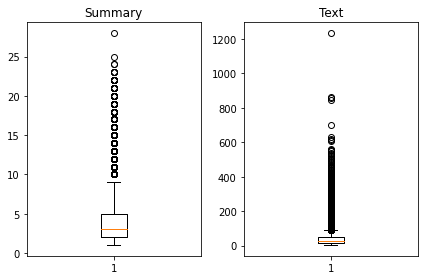

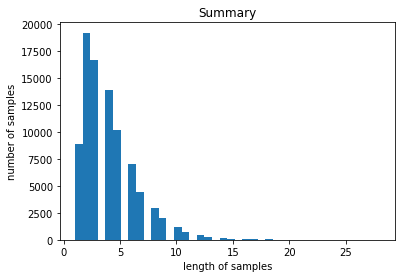

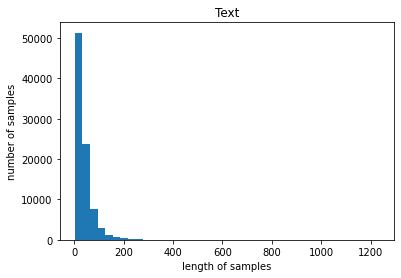

In [ ]:
#길이 분포 출력
text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))
print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('Summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

원문 텍스트는 대체적으로 100 이하의 길이를, 평균 길이는 38.
요약의 경우 대체적으로 15이하의 길이, 평균 길이는 4를 가짐.
-> 패딩의 길이는 평균 길이보다는 크게 잡아 각각 50과 8로 결정

In [ ]:
text_max_len = 50
summary_max_len = 8

In [ ]:
# 두 길이가 얼마나 많은 샘플들의 길이보다 큰지 확인
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
      cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt/len(nested_list))))


In [ ]:
below_threshold_len(text_max_len, data['Text'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.7745119121724859


Text열은 약 23%의 샘플이 길이 50보다 큼.

In [ ]:
below_threshold_len(summary_max_len, data['Summary'])

전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9424593967517402


Summary열은 약 6%의 샘플이 길이 8보다 큼 

In [ ]:
#정해준 최대 길이보다 큰 샘플들은 제거

data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split())<= summary_max_len)]

print('전체 샘플 수: ', (len(data)))

전체 샘플 수:  65818


In [ ]:
#정제 작업이 완료된 상위 샘플 5개 출력

data.head()

,Text,Summary
0,bought several vitality canned dog food produc...,good quality dog food
1,product arrived labeled jumbo salted peanuts p...,not as advertised
2,confection around centuries light pillowy citr...,delight says it all
3,looking secret ingredient robitussin believe f...,cough medicine
4,great taffy great price wide assortment yummy ...,great taffy


In [ ]:
#seq2seq 훈련을 위해 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가할 필요 
#시작 토큰은 'sostoken', 종료 토큰은 'eostoken'이라 명명하고 앞, 뒤로 추가

data['decoder_input'] = data['Summary'].apply(lambda x: 'sostoken'+x)
data['decoder_target'] = data['Summary'].apply(lambda x: x+'esotoken')
data.head()


,Text,Summary,decoder_input,decoder_target
0,bought several vitality canned dog food produc...,good quality dog food,sostokengood quality dog food,good quality dog foodesotoken
1,product arrived labeled jumbo salted peanuts p...,not as advertised,sostokennot as advertised,not as advertisedesotoken
2,confection around centuries light pillowy citr...,delight says it all,sostokendelight says it all,delight says it allesotoken
3,looking secret ingredient robitussin believe f...,cough medicine,sostokencough medicine,cough medicineesotoken
4,great taffy great price wide assortment yummy ...,great taffy,sostokengreat taffy,great taffyesotoken


In [ ]:
#인코더의 입력, 디코더의 입력과 레이블을 각각 저장

encoder_input = np.array(data['Text'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

*데이터의 분리

In [ ]:
#훈련 데이터와 테스트 데이터를 분리
#먼저 순서가 섞인 정수 시퀀스를 만들어줌

indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[61165 60938 37145 ... 45440 26023  1298]


In [ ]:
#위 정수 시퀀스를 데이터의 샘플 순서로 정의 -> 샘플의 순서 셔플

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [ ]:
#섞인 데이터를 8:2의 비율로 훈련 데이터와 테스트 데이터로 분리
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수: ', n_of_val)

테스트 데이터의 수:  13163


In [ ]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [ ]:
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 52655
훈련 레이블의 개수 : 52655
테스트 데이터의 개수 : 13163
테스트 레이블의 개수 : 13163


*정수 인코딩: 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩을 수행 -> 훈련 데이터에 대해 단어 집합 만들기

In [ ]:
#우선 원문에 해당하는 encoder_input_train에 대해 수행

src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)
#단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여됨.
#이는 src_tokenizer.word_index에 저장되어져 있음.
#이 중 빈도수가 낮은 단어들은 자연어 처리에서 배제하고자 함.
#등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인

In [ ]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) #단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총합

#단어와 빈도수의 쌍(pair)을 key와 value로 받음
for key, value in src_tokenizer.word_counts.items():
  total_freq = total_freq + value

  # 단어의 등장 빈도수가 threshold보다 작으면
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기: ', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s' %(threshold -1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s' %(total_cnt - rare_cnt))
print('단어 집합에서 희귀 단어의 비율:', (rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:', (rare_freq/total_freq)*100)

단어 집합(vocabulary)의 크기:  31987
등장 빈도가 6번 이하인 희귀 단어의 수: 23700
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8287
단어 집합에서 희귀 단어의 비율: 74.09260011879826
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.383968496474902


In [ ]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words = src_vocab)
src_tokenizer.fit_on_texts(encoder_input_train)

#텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

In [ ]:
#정수 인코딩이 정상 진행되었는지 확인

print(encoder_input_train[:3])

[[632, 179, 39, 1, 4640, 1303, 70, 1393, 7, 57, 980, 414, 361, 20, 447, 255, 54, 7683, 1241, 385, 298, 1772, 147, 39, 3, 49, 4388, 108], [4, 489, 206, 446, 91, 583, 100, 2009, 611, 867, 2202, 138, 2766, 334, 2202, 7, 4523, 871, 54, 446, 138, 55, 208, 611, 2009, 2708, 2766, 33, 446, 35, 2766, 2009, 618, 98, 9, 3147, 2767, 75, 100, 4054], [143, 93, 514, 123, 525, 197, 96, 190, 338, 856, 223, 71, 21, 5086, 394, 394, 239, 15, 531, 197]]


In [ ]:
#레이블에 해당하는 요약 데이터에 대해서도 수행

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

#단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여됨.
#이는 tar_tokenizer.word_index에 저장됨.


In [ ]:
#등장 빈도수가 6회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인
threshold = 6
total_cnt = len(tar_tokenizer.word_index) #단어의 수
rare_cnt = 0 #등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 #훈련 데이터의 전체 단어 빈도수 총합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총합

#단어와 빈도수의 쌍은 key와 value로 받음.
for key, value in tar_tokenizer.word_counts.items():
  total_freq = total_freq + value

  #단어의 등장 빈도수가 threshold보다 작으면
  if(value<threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value


print('단어 집합(vocabulary)의 크기:', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s' %(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기: %s' %(total_cnt - rare_cnt))
print('단어 집합에서 희귀 단어의 비율:', (rare_cnt/total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq/total_freq)*100)

단어 집합(vocabulary)의 크기: 13578
등장 빈도가 5번 이하인 희귀 단어의 수: 10826
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기: 2752
단어 집합에서 희귀 단어의 비율: 79.73191928119016
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.105962623687988


In [ ]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words = tar_vocab)
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

In [ ]:
#텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train)
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

In [ ]:
print(decoder_input_train[:5])

[[702, 13], [127, 10, 555], [215, 58, 411, 376, 176], [1416], [101, 181]]


In [ ]:
print(decoder_target_train[:5])

[[153, 183], [13, 10, 587], [69, 58, 411, 376, 345], [419], [49, 380]]


*빈 샘플 제거: 전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것 = 빈도수가 낮은 단어만으로 구성되었던 샘플들은 이제 빈 샘플이 되었음 -> 길이가 상대적으로 길었던 원문(Text)의 경우에는 문제가 별로 없겠지만, 애초에 평균 길이가 4밖에 되지 않았던 요약문(Summary)의 경우, 이 현상이 두드러졌을 가능성이 높아 위험.
∇
주의할 점은 요약문인 decoder_input에는 sostoken 또는 decoder_target에는 eostoken이 추가된 상태이고, 이 두 토큰은 모든 샘플에서 등장하므로 빈도수가 샘플수와 동일하여 단어 집합 제한에도 삭제되지 않음. 따라서 이제 길이가 0이된 요약문의 실질적 길이는 1임. decoder_input에는 sostoken, decoder_target에는 eostoken만 남았을 것이기 때문.

In [ ]:
#train과 test 데이터에 대해 요약문의 길이가 1인 경우의 인덱스를 각각 저장
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence)==1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) ==1]

In [ ]:
print('삭제할 훈련 데이터의 개수: ', len(drop_train))
print('삭제할 테스트 데이터의 개수: ', len(drop_test))

삭제할 훈련 데이터의 개수:  9043
삭제할 테스트 데이터의 개수:  2335


In [ ]:
#삭제 후의 개수
encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수: ', len(encoder_input_train))
print('훈련 레이블의 개수: ', len(decoder_input_train))
print('테스트 데이터의 개수: ', len(encoder_input_test))
print('테스트 레이블의 개수: ', len(decoder_input_test))

훈련 데이터의 개수:  43612
훈련 레이블의 개수:  43612
테스트 데이터의 개수:  10828
테스트 레이블의 개수:  10828


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


* 패딩하기

In [ ]:
#앞서 계산해둔 최대 길이로 맞추어 훈련 데이터와 테스트 데이터에 대해 패딩 작업 수행
encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = summary_max_len, padding='post')

decoder_target_train = pad_sequences(decoder_target_train, maxlen = summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = summary_max_len, padding='post')


# seq2seq + attention으로 요약 모델 설계 및 훈련 시키기

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
#인코더 설계 - 인코더는 LSTM 층을 3개 쌓음

embedding_dim = 128
hidden_size = 256

#인코더
encoder_inputs = Input(shape=(text_max_len,))

#인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

#인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

In [ ]:
#디코더 설계 - 인코더와 동일하지만 초기 상태를 인코더의 상태로 주어야 하는 것에 주의
decoder_inputs = Input(shape=(None,))

#디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

#디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [ ]:
#디코더의 출력층 설계
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)

#모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding_7 (Embedding)        (None, 50, 128)      1024000     ['input_5[0][0]']                
                                                                                                  
 lstm_5 (LSTM)                  [(None, 50, 256),    394240      ['embedding_7[0][0]']            
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [ ]:
#어텐션 메커니즘이 결합된 새로운 출력층 설계
#urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/20.%20Text%20Summarization/attention.py", filename="attention.py")
#from attention import AttentionLayer
#위 주소 막힘

HTTPError: ignored

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x=[encoder_input_train, decoder_input_train], y = decoder_target_train, \
                    validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
                    batch_size = 256, callbacks=[es], epochs=50)

Epoch 1/50
171/171 [==============================] - 934s 5s/step - loss: 2.5749 - val_loss: 2.1009
Epoch 2/50
171/171 [==============================] - 994s 6s/step - loss: 1.8029 - val_loss: 1.4609
Epoch 3/50
171/171 [==============================] - 880s 5s/step - loss: 1.2771 - val_loss: 1.0473
Epoch 4/50
171/171 [==============================] - 879s 5s/step - loss: 0.9486 - val_loss: 0.8023
Epoch 5/50
171/171 [==============================] - 1191s 7s/step - loss: 0.7372 - val_loss: 0.6352
Epoch 6/50
171/171 [==============================] - 956s 6s/step - loss: 0.5943 - val_loss: 0.5382
Epoch 7/50
171/171 [==============================] - 892s 5s/step - loss: 0.4965 - val_loss: 0.4597
Epoch 8/50
171/171 [==============================] - 884s 5s/step - loss: 0.4335 - val_loss: 0.4114
Epoch 9/50
171/171 [==============================] - 883s 5s/step - loss: 0.3889 - val_loss: 0.3845
Epoch 10/50
171/171 [==============================] - 881s 5s/step - loss: 0.3521 - val_l

In [ ]:
#학습 과정 중 기록된 훈련 데이터의 손실과 테스트 데이터의 손실 히스토리 시각화
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Seq2seq + attention으로 요약 모델 테스트하기

In [ ]:
#테스트를 위해 필요한 3개의 사전 만들기

#원문 단어 집합에서 정수 -> 단어를 얻음
src_index_to_word = src_tokenizer.index_word

#요약 단어 집합에서 단어 -> 정수를 얻음
tar_word_to_index = tar_tokenizer.word_index

#요약 단어 집합에서 정수 -> 단어를 얻음
tar_index_to_word = tar_tokenizer.index_word

In [ ]:
#seq2seq는 훈련 단계와 테스트 단계의 동작이 다르므로 테스트 단계의 모델을 별도로 설계
#다시 새로운 seq2seq 모델 설계

#인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])


In [ ]:
#이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
#문장의 다음 단어를 예측하기 위해서 초기 상태를 이전 시점의 상태로 사용. 
#이는 뒤의 함수 decode_sequence()에 구현
#훈련 과정에서와 다르게 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음
decoder_output2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [ ]:
#어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hideen_state_input,decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

#디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat)

#최종 디코더 모델
decoder_mode = Model([decoder_inputs]+[decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
                     [decoder_outputs2]+[state_h2, state_c2])

#테스트 단계를 위한 모델 완성

In [ ]:
#테스트를 위해 사용되는 함수 decode_sequence를 설계

def decode_sequence(input_seq):
  #입력으로부터 인코더의 상태를 얻음
  e_out, e_h, e_c = encoder_model.predict(input_seq)

  #<SOS>에 해당하는 토큰 생성
  target_seq = np.zeros((1,1))
  target_seq[0,0] = tar_word_to_index['sostoken']

  stop_condition = False
  decoded_sentence = ''
  while not stop_condition: #stop_condition이 True가 될 때까지 루프 반복
    
    output_tokens, h, c = decoder_model.predict([target_seq]+[e_out, e_h, e_c])
    sampled_token_index = np.argmax(output_tokens[0,-1,:])
    sampled_token = tar_index_to_word[sampled_token_index]

    if(sampled_token!='eostoken'):
      decoded_sentence += ' '+sampled_token

      # <eos>에 도달하거나 최대 길이를 넘으면 중단
    if(sampled_token=='eostoken' or len(decoded_sentence.split())>=(summary_max_len-1)):
      stop_condition = True

      #길이가 1인 타겟 시퀀스를 업데이트
      target_seq = np.zeros((1,1))
      target_seq[0,0] = sampled_token_index

      #상태를 업데이트
      e_h, e_c = h,c

  return decoded_sentence


In [ ]:
#테스트 단계에서 원문과 실제 요약문, 예측 요약문을 비교하기 위해 정수 시퀀스를 텍스트 시퀀스로 만드는 함수 설계

# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
  sentence=''
  for i in input_seq:
    if(i!=0):
      sentence = sentence + src_index_to_word[i]+' '
  return sentence

#요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
  sentence = ''
  for i in input_seq:
    if(i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
      sentence = sentence + tar_index_to_word[i] +' '
  return sentence

In [ ]:
#테스트 샘플 중 500-1000번까지 테스트

for i in range(500,1000):
  print("원문: ", seq2text(encoder_input_test[i]))
  print("실제 요약문: ", seq2summary(decoder_input_test[i]))
  print("예측 요약문: ", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
  print("\n")
  

### **2️⃣ Text summarization task**

🔹 2-(1) Pororo - text summarization 

📌 [공식문서](https://kakaobrain.github.io/pororo/seq2seq/summary.html) 

📌 [예제 실습](https://teddylee777.github.io/machine-learning/nlp-korean-pororo) 

* PORORO : 카카오 브레인에서 제공한 자연어 처리 라이브러리

🔹 2-(2) BERT 를 이용한 text summarization 

📌 [논문 리뷰](https://medium.com/@eyfydsyd97/bert%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EC%9A%94%EC%95%BD-text-summary-b582b5cc7d) 

📌 [BERT Extractive summarizer Library](https://github.com/dmmiller612/bert-extractive-summarizer) 


📌 [Text summarization Github Repo](https://github.com/uoneway/Text-Summarization-Repo) 



➕ [BERT 를 이용한 뉴스 요약 자동화 App 구현 Repo](https://github.com/huydang90/News-Summarization-with-BERT) 👉 프로젝트 예시 참고 자료

